# Python notebook 

## Summary statistics
Amazon co-purchase data analysis


In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle

In [7]:
from neo4j.v1 import GraphDatabase

In [8]:
from neo4jrestclient.client import GraphDatabase
from neo4jrestclient.constants import RAW
from neo4jrestclient.client import Node 
from urllib.parse import urlparse
import re, json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

In [12]:
db = GraphDatabase("http://localhost:7474/db/data")
#retrieve a list of all nodes with the labels
q = "MATCH (n) RETURN distinct labels(n), count(*)"
params = {}
nodes = db.query(q, params=params, returns=RAW)
q = "match (n)-[r]-() return distinct type(r), count(r);"
relationships = db.query(q, params=params, returns=RAW)

In [22]:
labels = []
counts = []
data = {}
for result in nodes:
    labels.append(result[0][0])
    counts.append(result[1]) 
    data[result[0][0]] = result[1]

In [23]:
labs=[]
count=[]
datum = {}
for result in relationships:
    labs.append(result[0].replace("'",''))
    count.append(result[1])
    datum[result[0].replace("'",'')] = result[1]


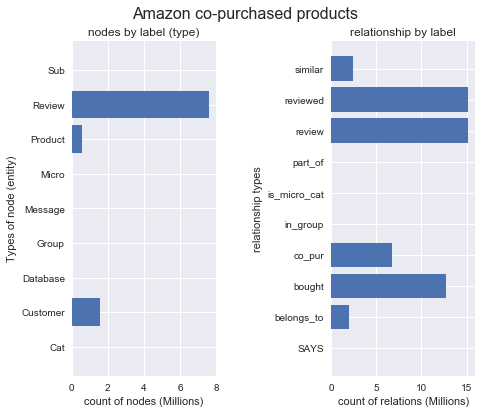

In [15]:
plt.figure(1)
plt.subplot(1,2,1)
types = [1,1,1,1,1,1,1,1,1]
counts_scaled = [count / 1000000 for count in counts]
ax = plt.barh(labels,counts_scaled)
plt.title('nodes by label (type)')              
plt.xlabel('count of nodes (Millions)')
plt.ylabel('Types of node (entity)')
plt.suptitle('Amazon co-purchased products', fontsize=16)
plt.subplot(1,2,2)
counts_scaled = [co / 1000000 for co in count]
ax = plt.barh(labs,counts_scaled)
plt.title('relationship by label')            
plt.xlabel('count of relations (Millions)')
plt.ylabel('relationship types')
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.9)
plt.show()


In [36]:
data

{'Cat': 13,
 'Customer': 1555170,
 'Database': 1,
 'Group': 10,
 'Message': 1,
 'Micro': 675,
 'Product': 548552,
 'Review': 7593244,
 'Sub': 106}

In [30]:
datum

{'SAYS': 2,
 'belongs_to': 1969830,
 'bought': 12718364,
 'co_pur': 6774776,
 'in_group': 78,
 'is_micro_cat': 1786,
 'part_of': 226,
 'review': 15186488,
 'reviewed': 15186488,
 'similar': 2462878}